## <font color=green> Praticando: Analisando o Dataset do Titanic

In [1]:
import pandas as pd
import numpy as np

In [2]:
%config Completer.use_jedi = False

### Carregando Dataset

In [3]:
df_titanic = pd.read_csv('datasets/titanic.csv')
df_titanic.shape

(1309, 12)

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Passengerid**: ID do passageiro do navio (código primário).
- **Survived**: Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
- **Pclass**: Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
- **Name**: Nome do passageiro
- **Sex**: Gênero do passageiro, sendo masculino e feminino.
- **Age**: Idade do passageiro na data da ocorrência do naufrágio.
- **SibSp**: Número de irmãos / cônjuges a bordo.
- **Parch**: Número de pais / filhos a bordo.
- **Ticket**: Código do ticket.
- **Fare**: Valor da passagem.
- **Cabin**: Código de identificação da Cabine.
- **Embarked**: Local onde o passageiro embarcou no navio.

### Verificando os tipos de dados contidos no Dataset

In [5]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.00,655.0000,982.0000,1309.0
Survived,1309.0,0.377387,0.484918,0.00,0.00,0.0000,1.0000,1.0
Pclass,1309.0,2.294882,0.837836,1.00,2.00,3.0000,3.0000,3.0
Age,1046.0,29.881138,14.413493,0.17,21.00,28.0000,39.0000,80.0
SibSp,1309.0,0.498854,1.041658,0.00,0.00,0.0000,1.0000,8.0
Parch,1309.0,0.385027,0.865560,0.00,0.00,0.0000,0.0000,9.0
Fare,1309.0,4425.079523,25407.652350,0.00,8.05,20.2125,57.9792,262375.0


- A variável idade tem como valor máximo 80. Contudo o 3º quartil mostra a idade de 39 anos, o que indica que há outliers
- Quanto a coluna Fare (valor da passagem), temos outliers distorcendo a distribuição dos valores desta variável, puxando a média para 4428.39 sendo que a mediana está em 20.08

### Explorando os dados categóricos e numéricos

In [7]:
cat_col = [var for var in df_titanic.columns if df_titanic[var].dtype == 'O']
df_titanic.loc[:,cat_col].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [8]:
num_col = [var for var in df_titanic.columns if df_titanic[var].dtype != 'O']
df_titanic.loc[:,num_col].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7925.0000
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


- 3 variáveis discretas: Pclass, SibSp e Parch
- 2 variáveis contínuas: Fare e Age
- 1 variável Id: PassengerId (chave primária).
- 1 binário: Survived (booleano).

- Percentual de dados faltantes na base de treino

In [9]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex            10.92
Age            20.09
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.46
Embarked        0.00
dtype: float64

- Podemos observar que há 3 colunas com dados faltantes: Sex, Age e Cabin

## Vamos explorar o dataset para analisar o que é possível fazer para preencher os dados faltantes

- Total de Passageiros

In [10]:
df_titanic.shape[0]

1309

- Total de Passageiros com todos os registros preenchidos (linhas)

In [11]:
df_titanic.dropna().shape[0]

232

- Percentual de dados com 100% do preenchimento dos dados

In [12]:
round(df_titanic.dropna().shape[0] / len(df_titanic)*100, 2)

17.72

- Selecionando os registros com dados ausentes para a coluna Pclass

In [13]:
df_titanic[df_titanic['Pclass'].isnull()].shape[0]

0

- Não temos nenhum registro faltante para a coluna Pclass

- É interessante conseguir extrair os títulos dos nomes para verificar se temos realmente correlação entre as variáveis

In [14]:
def extrai_titulo(df):
    df['Título'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())

extrai_titulo(df_titanic)

- Checando se a coluna Título foi criada corretamente

In [15]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


- Checando se há algum registro sem título

In [16]:
df_titanic[df_titanic['Título'].isnull()].shape[0]

0

Título
mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
major             2
mlle              2
ms                2
mme               1
don               1
sir               1
lady              1
capt              1
the countess      1
jonkheer          1
dona              1
Name: count, dtype: int64

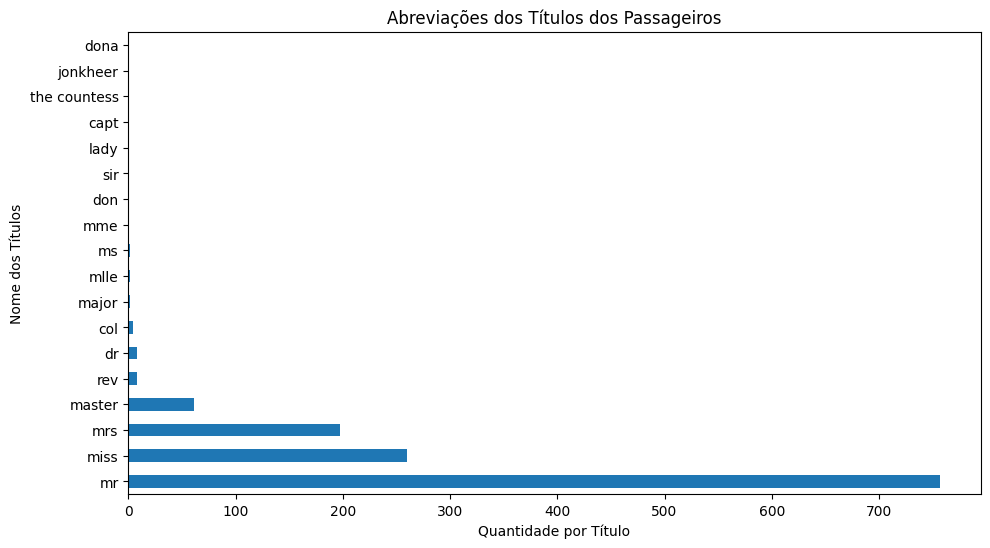

In [17]:
fig = df_titanic['Título'].value_counts().plot.barh(figsize=(11,6))
fig.set_title('Abreviações dos Títulos dos Passageiros')
fig.set_ylabel('Nome dos Títulos')
fig.set_xlabel('Quantidade por Título')

df_titanic['Título'].value_counts()

- Conforme o gráfico acima, temos vários títulos

- Vamos investigar os outliers como já identificamos acima nas variáveis Age e Fare. Para isso, vamos utilizar o boxplot.

<Axes: >

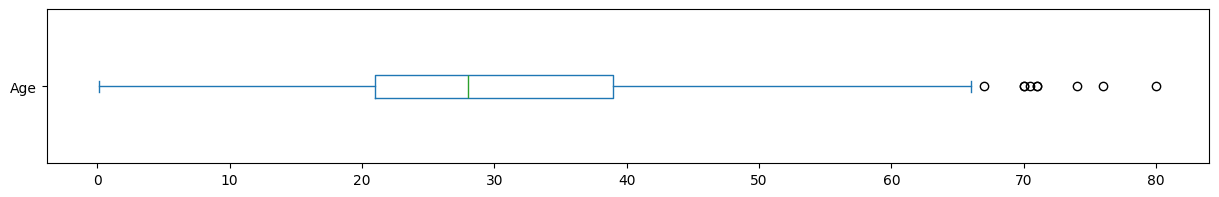

In [18]:
df_titanic['Age'].plot.box(vert=False, figsize=(15,2))

<Axes: >

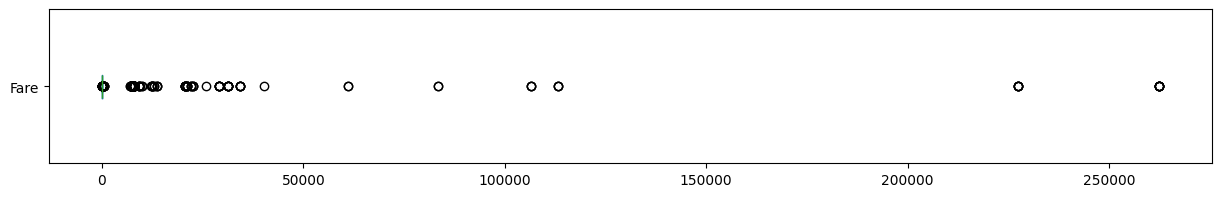

In [19]:
df_titanic['Fare'].plot.box(vert=False, figsize=(15,2))

- Como já esperado, diversos Outliers

- Para a coluna Fare, a quantidade de outiliers é tão grande que não conseguimos visualizar o box. Portanto, vamos filtrar por Fare menor que 500.

<Axes: >

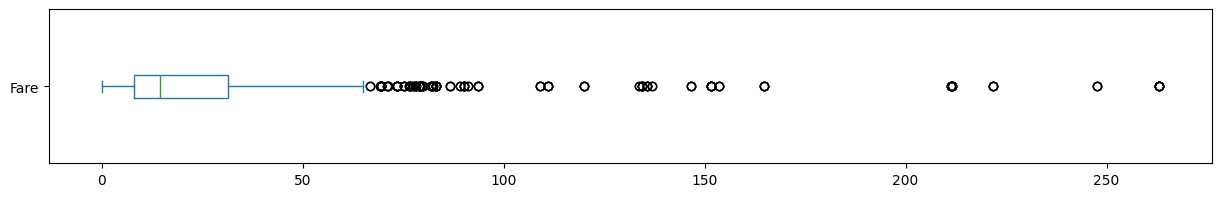

In [20]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].plot.box(vert=False, figsize=(15,2))

- Analisando a distribuição das variáveis para descobrir se elas são gaussianas (normais) ou distorcidas (assimétricas)

<Axes: >

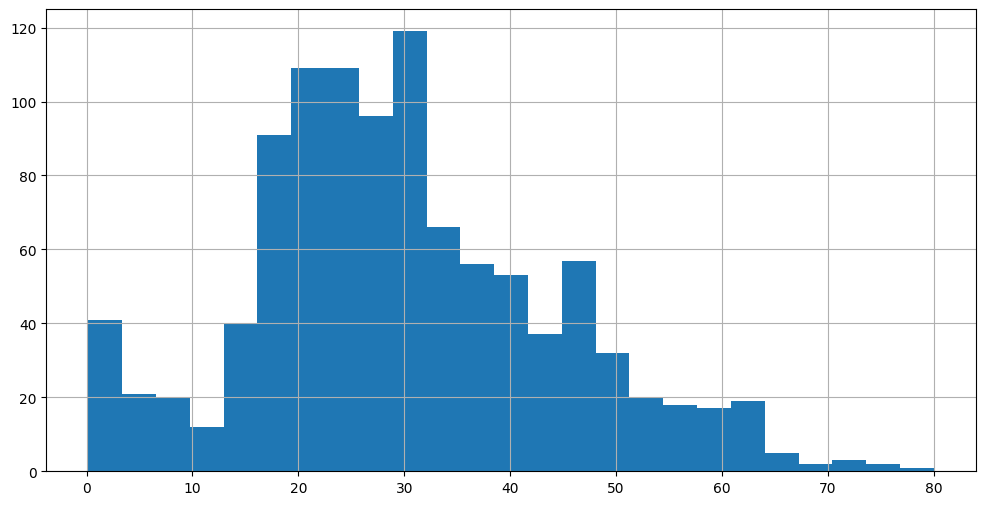

In [21]:
df_titanic['Age'].hist(bins = 25, figsize=(12,6))

<Axes: >

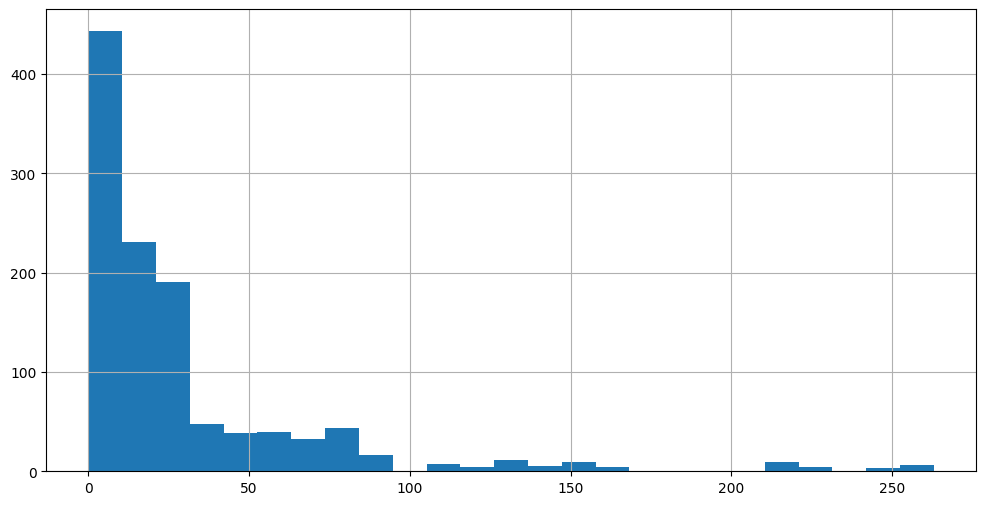

In [22]:
df_titanic['Fare'].loc[df_titanic['Fare'] < 500].hist(bins = 25, figsize=(12,6))

- Vamos ver a distribuição de pessoas por tipo de classe de passagem

<Axes: ylabel='Pclass'>

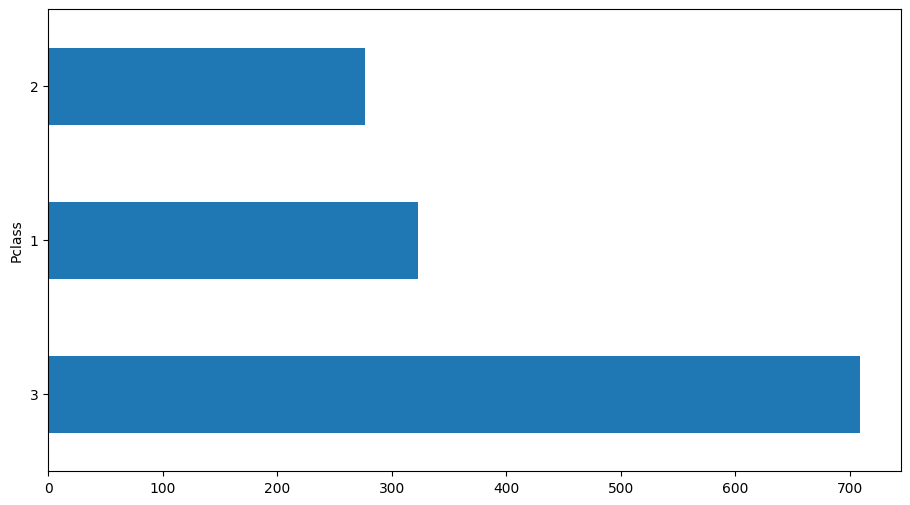

In [23]:
df_titanic['Pclass'].value_counts().plot.barh(figsize=(11,6))

- Vamos identificar qual o nosso *threshold* de valor da passagem pago apenas pelos passageiros da Primeira Classe

In [24]:
df_titanic.loc[df_titanic['Fare'] > 10000].groupby(['Pclass','Fare'])[['PassengerId']].count()

PassengerId
Pclass Fare                 
1      25925.0             1
       40125.0             1
       61175.0             2
       83475.0             2
       106425.0            3
       113275.0            3
       227525.0            5
       262375.0            7
2      12275.0             1
       12525.0             1
       12875.0             2
3      12475.0             4
       13775.0             3
       20525.0             3
       20575.0             4
       21075.0             5
       22025.0             3
       22525.0             3
       29125.0             6
       31275.0             7
       34375.0             5

- Podemos perceber que o valor mais alto pago na terceira classe foi de 34375. Ou seja, todo mundo que pagou um valor acima desse está na primeira classe.

- Vamos identificar agora a distribuição das classes das pessoas pelos seus títulos

In [25]:
df_titanic.groupby(['Título','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Título       Pclass                                                        
capt         1                 1         1     1    1    1      1      1   
col          1                 4         4     4    4    4      4      4   
don          1                 1         1     1    0    1      1      1   
dona         1                 1         1     1    1    1      1      1   
dr           1                 6         6     6    6    5      6      6   
             2                 2         2     2    1    2      2      2   
jonkheer     1                 1         1     1    1    1      1      1   
lady         1                 1         1     1    1    1      1      1   
major        1                 2         2     2    2    2      2      2   
master       1                 5         5     5    5    5      5      5   
             2                11        11    11   10   11     11     11   
             3                45        45    45   39   37     45     45   
miss         1                60        60    60   49   59     60     60   
             2                50        50    50   47   48     50     50   
             3               150       150   150  135  103    150    150   
mlle         1                 2         2     2    2    2      2      2   
mme          1                 1         1     1    1    1      1      1   
mr           1               159       159   159  139  132    159    159   
             2               150       150   150  130  137    150    150   
             3               448       448   448  411  312    448    448   
mrs          1                77        77    77   65   67     77     77   
             2                55        55    55   48   54     55     55   
             3                65        65    65   57   49     65     65   
ms           2                 1         1     1    1    1      1      1   
             3                 1         1     1    1    0      1      1   
rev          2                 8         8     8    7    8      8      8   
sir          1                 1         1     1    1    1      1      1   
the countess 1                 1         1     1    1    1      1      1   

                     Ticket  Fare  Cabin  Embarked  
Título       Pclass                                 
capt         1            1     1      1         1  
col          1            4     4      3         4  
don          1            1     1      0         1  
dona         1            1     1      1         1  
dr           1            6     6      4         6  
             2            2     2      0         2  
jonkheer     1            1     1      0         1  
lady         1            1     1      1         1  
major        1            2     2      2         2  
master       1            5     5      5         5  
             2           11    11      3        11  
             3           45    45      1        45  
miss         1           60    60     48        60  
             2           50    50      6        50  
             3          150   150      4       150  
mlle         1            2     2      2         2  
mme          1            1     1      1         1  
mr           1          159   159    120       159  
             2          150   150      7       150  
             3          448   448      8       448  
mrs          1           77    77     66        77  
             2           55    55      7        55  
             3           65    65      3        65  
ms           2            1     1      0         1  
             3            1     1      0         1  
rev          2            8     8      0         8  
sir          1            1     1      1         1  
the countess 1            1     1      1         1

- Todos que estão na terceira classe possuem o título de ms, mrs, mr e master. Todos os outros estão na segunda ou primeira classe.

In [26]:
df_titanic.loc[df_titanic['Fare'] > 50000]['Pclass'].value_counts()

Pclass
1    22
Name: count, dtype: int64

- Vamos encontrar a média de preço para os passageiros da primeira, segunda e terceira classe (exlcuindo os Outliers para não subir a média)

- 1ª classe

<Axes: >

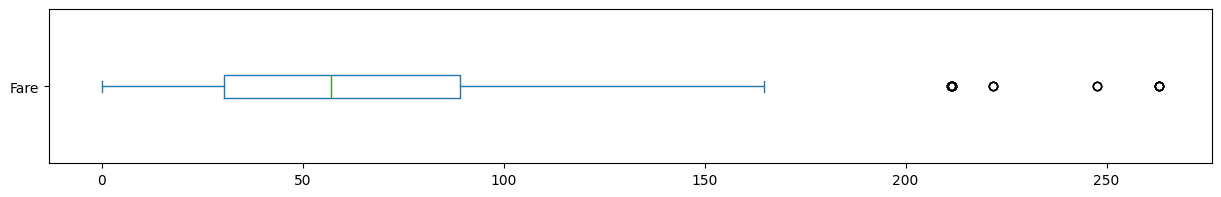

In [27]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 1)].plot.box(vert=False, figsize=(15,2))

In [28]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 200) & (df_titanic['Pclass'] == 1)].mean()

np.float64(62.69911465201465)

- 2ª classe

<Axes: >

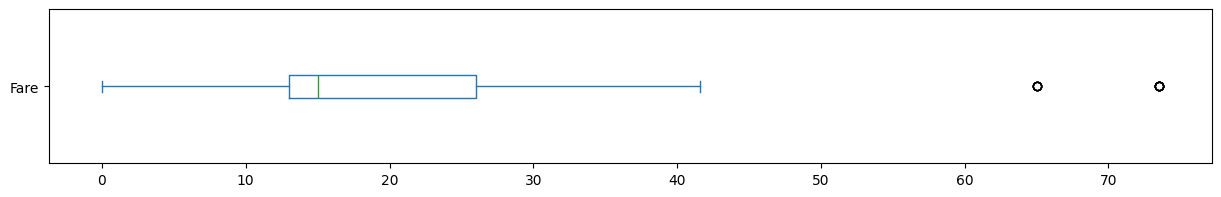

In [29]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 2)].plot.box(vert=False, figsize=(15,2))

In [30]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 60) & (df_titanic['Pclass'] == 2)].mean()

np.float64(19.067384674329503)

- 3ª classe

<Axes: >

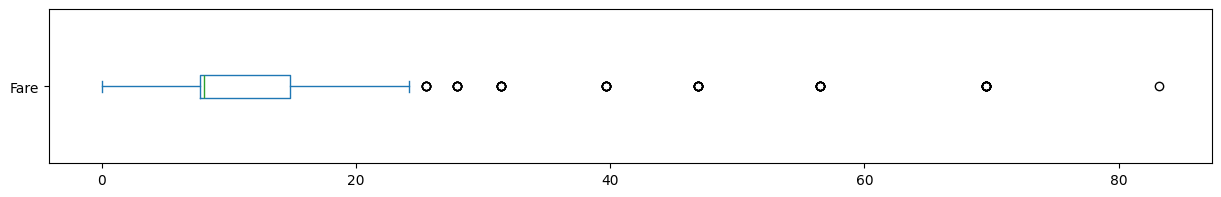

In [31]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 500) & (df_titanic['Pclass'] == 3)].plot.box(vert=False, figsize=(15,2))

In [32]:
df_titanic['Fare'].loc[(df_titanic['Fare'] < 30) & (df_titanic['Pclass'] == 3)].mean()

np.float64(10.45326592178771)

### Tratando dados ausentes da coluna Sex

- Como poderíamos fazer isso?

- Uma alternativa é identicar seu gênero de acordo com o título do passageiro

In [33]:
df_titanic['Título'].unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

- Verificando se há algum passageiro que não possui título

In [34]:
df_titanic[df_titanic['Título'].isnull()].shape[0]

0

- Listando títulos masculinos

In [35]:
list_male = ['mr', 'master', 'don', 'rev', 'dr', 'major', 'sir', 'col', 'capt', 'jonkheer']

- Filtrando resultado que não possuem definição na coluna Sex

In [36]:
df_aux = df_titanic[df_titanic['Sex'].isnull()]
df_aux

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
11,12,1,1,"Bonnell, Miss. Elizabeth",NaN,58.0,0,0,113783,26.5500,C103,S,miss
12,13,0,3,"Saundercock, Mr. William Henry",NaN,20.0,0,0,A/5. 2151,8.0500,NaN,S,mr
13,14,0,3,"Andersson, Mr. Anders Johan",NaN,39.0,1,5,347082,31275.0000,NaN,S,mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",NaN,14.0,0,0,350406,7.8542,NaN,S,miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",NaN,NaN,0,0,334915,7.7208,NaN,Q,miss
1300,1301,1,3,"Peacock, Miss. Treasteall",NaN,3.0,1,1,SOTON/O.Q. 3101315,13775.0000,NaN,S,miss
1301,1302,1,3,"Naughton, Miss. Hannah",NaN,NaN,0,0,365237,7.7500,NaN,Q,miss
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",NaN,37.0,1,0,19928,90.0000,C78,Q,mrs


- Atribuindo o gênero do passageiro de acordo com o seu título

In [37]:
df_aux['Sex'] = df_aux['Título'].apply(lambda x: 'male' if x in list_male else 'female')
df_aux

/tmp/ipykernel_1047277/2219334617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['Sex'] = df_aux['Título'].apply(lambda x: 'male' if x in list_male else 'female')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,miss
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31275.0000,NaN,S,mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,miss
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13775.0000,NaN,S,miss
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,miss
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,mrs


- Combinando os dois dataframes

In [38]:
df_titanic = df_titanic.combine_first(df_aux)

In [39]:
df_titanic[df_titanic['Sex'].isnull()].shape[0]

0

- Podemos observar que todos os passageiros possui o registro de gênero

### Tratando a coluna Age (Idade) para valores faltantes

In [40]:
df_titanic[df_titanic["Age"].isnull()].shape[0]

263

- Temos 263 passageiros sem idade

- Podemos inserir as faixas de idades conforme classe e gênero

In [41]:
df_titanic.groupby(['Pclass','Sex'])[['Age']].mean()

Age
Pclass Sex              
1      female  37.037594
       male    41.029272
2      female  27.499223
       male    30.815380
3      female  22.185329
       male    25.962264

- Ou podemos tratar a idade por classe e título. Irá dar mais trabalho, mas ficará mais próximo da realidade.

In [42]:
df_aux = df_titanic.groupby(['Pclass','Título'], as_index=False)[['Age']].mean()
df_aux

,Pclass,Título,Age
0,1,capt,70.000000
1,1,col,54.000000
2,1,don,40.000000
3,1,dona,39.000000
4,1,dr,45.600000
5,1,jonkheer,38.000000
6,1,lady,48.000000
7,1,major,48.500000
8,1,master,6.984000
9,1,miss,30.338983


- Como pode ser visto, apena ms da terceira classe não possui idade. Vamos assumir então para essa situação o valor de ms da segunda classe.

In [43]:
df_aux['Age'].loc[27] = df_aux['Age'].loc[21]
df_aux

/tmp/ipykernel_1047277/3070663308.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_aux['Age'].loc[27] = df_aux['Age'].loc[21]
/tmp/ipykernel_1047277/3070663308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Pclass,Título,Age
0,1,capt,70.000000
1,1,col,54.000000
2,1,don,40.000000
3,1,dona,39.000000
4,1,dr,45.600000
5,1,jonkheer,38.000000
6,1,lady,48.000000
7,1,major,48.500000
8,1,master,6.984000
9,1,miss,30.338983


In [44]:
df_titanic[df_titanic['Age'].isnull()].shape[0]

263

- Podemos ver que há 263 registros sem Age

- Vamos utilizar uma função que retorna a média de idade baseada na média de idade de classe e título.

In [45]:
def impute_age(age_pclass_titulo):
    age = age_pclass_titulo[0]
    pclass = age_pclass_titulo[1]
    titulo = age_pclass_titulo[2]
    if pd.isnull(age):
        return df_aux['Age'].loc[(df_aux['Pclass']==pclass) & (df_aux['Título']==titulo)].values[0]
    else:
        return age

In [46]:
df_titanic['Age'] = df_titanic[['Age','Pclass','Título']].apply(impute_age, axis = 1)

/tmp/ipykernel_1047277/1665821771.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = age_pclass_titulo[0]
/tmp/ipykernel_1047277/1665821771.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = age_pclass_titulo[1]
/tmp/ipykernel_1047277/1665821771.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  titulo = age_pclass_titulo[2]


In [47]:
df_titanic[df_titanic['Age'].isnull()].shape[0]

0

### Tratando a coluna Cabin

- Agora só temos a coluna Cabin com dados faltantes que possui ~33% dos dados

In [48]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.46
Embarked        0.00
Título          0.00
dtype: float64

In [49]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7925.0000,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,mr
5,6,0,3,"Moran, Mr. James",male,28.31891,0,0,330877,8.4583,NaN,Q,mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21075.0000,NaN,S,master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,mrs


- Vamos verificar como estão distribuídas as cabines por classe, selecionando apenas a letra inicial de cada observação

In [50]:
df_titanic['Ale_cabin'] = df_titanic['Cabin'].str[0].str.lower().str.strip()

In [51]:
df_titanic.groupby('Pclass')['Ale_cabin'].value_counts()

Pclass  Ale_cabin
1       c            94
        b            65
        d            40
        e            34
        a            22
        t             1
2       f            13
        d             6
        e             4
3       f             8
        g             5
        e             3
Name: count, dtype: int64

- Temos a seguinte distribuição das cabines por classe:
    - Classe 1 = a, b, c, d, e, t
    - Classe 2 = d, e, f
    - Classe 3 = e, g, f

- Podemos remover a coluna Ale_cabin pois ja extraimos o que precisamos

In [52]:
del df_titanic['Ale_cabin']

- Vamos criar um dicionário onde a chave é a classe e os valores são as possíveis letras das cabines

In [53]:
dict_classe = {1:['a', 'b', 'c', 'd', 'e', 't'],
               2:['d', 'e', 'f'],
               3:['e', 'g', 'h']}

- Filtrando registros de Cabin nula

In [54]:
df_aux = df_titanic[df_titanic['Cabin'].isnull()]
df_aux

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7925.0000,NaN,S,miss
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,mr
5,6,0,3,"Moran, Mr. James",male,28.31891,0,0,330877,8.4583,NaN,Q,mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21075.0000,NaN,S,master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7775.0000,NaN,S,miss
1304,1305,0,3,"Spector, Mr. Woolf",male,28.31891,0,0,A.5. 3236,8.0500,NaN,S,mr
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr
1307,1308,0,3,"Ware, Mr. Frederick",male,28.31891,0,0,359309,8.0500,NaN,S,mr


- Vamos imputar os dados com a função choice do numpy

In [55]:
df_aux['Cabin'] = df_titanic['Pclass'].apply(lambda x: np.random.choice(dict_classe[x], size=1)[0])

/tmp/ipykernel_1047277/654337835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['Cabin'] = df_titanic['Pclass'].apply(lambda x: np.random.choice(dict_classe[x], size=1)[0])


In [56]:
df_aux.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Título
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,g,S,mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7925.0000,h,S,miss
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,g,S,mr
5,6,0,3,"Moran, Mr. James",male,28.31891,0,0,330877,8.4583,e,Q,mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21075.0000,e,S,master


- Combinando os dois dataframes

In [57]:
df_titanic = df_titanic.combine_first(df_aux)

In [58]:
df_titanic[df_titanic['Cabin'].isnull()].shape[0]

0

- Podemos observar que todos os registros de Cabin possuem pelo menos um letra associada

In [59]:
round(df_titanic.isnull().mean()*100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Título         0.0
dtype: float64

- E com isso, finalizamos nossa atividade de limpeza dos dados. Todas as colunas possuem dados.

- Vamos explorar visualmente nossos dados. Vamos visualizar as pessoas que sobreviveram baseado na classe e gênero

- Pessoas que sobreviveram

<Axes: xlabel='Pclass'>

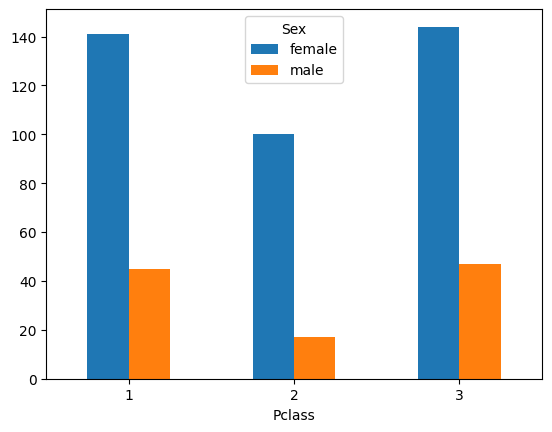

In [60]:
survived = df_titanic.loc[df_titanic['Survived'] == 1]
percentual = pd.crosstab(survived.Sex,
                         survived.Pclass,
                         aggfunc = 'count',
                         values = survived.Survived)

percentual.T.plot.bar(rot=0)

- Pessoas que não sobreviveram

<Axes: xlabel='Pclass'>

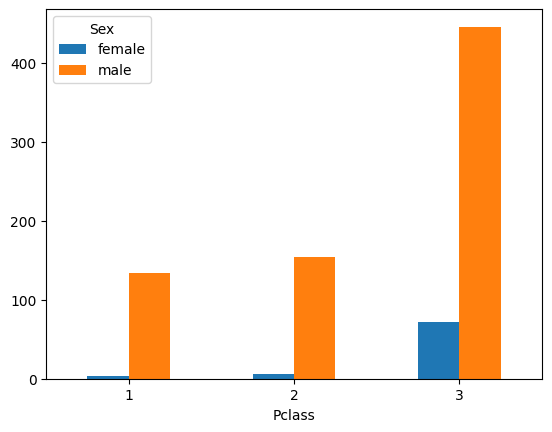

In [61]:
not_survived = df_titanic.loc[df_titanic['Survived'] == 0]
percentual = pd.crosstab(not_survived.Sex,
                         not_survived.Pclass,
                         aggfunc = 'count',
                         values = not_survived.Survived)

percentual.T.plot.bar(rot=0)

- Conforme nosso gráfico acima, em todas as classes o percentual de mulheres sobrevivente é superior aos homens e fica mais expressivo quando olhamos para a primeria e segunda classe.


- Média de idade dos que sobreviveram e dos que morreram

In [62]:
df_titanic.groupby('Survived')[['Age']].mean()

,Age
Survived,
0,30.103622
1,28.552944
